<a href="https://colab.research.google.com/github/carolines03/DS-project/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results
We are using the voting_VA.csv which holds voting data for each presidential election from 2000 to 2020. In the following document, the data will be transformed into the format of a row for each county & election year pair, where the record holds info on the total democratic, republican, and other party votes. Other variables, such as vote share, margin of victory, and party trend will be calculated to derive more insight to historical voting trends in VA throughout the years. These variables will be used as features to predict the party outcome in each county, 0 for a Democratic win and 1 for a Republican win. We use this binary outcome since there has not been a win recorded from another party in the years investigated, so we focus on the 2 most significant parties. Thus, the following research answers the question of how significant historic voting trends are when predicting the outcome of the election in individual counties.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('/voting_VA.csv', low_memory=False)
print(df.shape, '\n')
print(df.dtypes, '\n')
print(df.columns, '\n')
df.head()

(3736, 13) 

Unnamed: 0         int64
year               int64
state             object
state_po          object
county_name       object
county_fips        int64
office            object
candidate         object
party             object
candidatevotes     int64
totalvotes         int64
version            int64
mode              object
dtype: object 

Index(['Unnamed: 0', 'year', 'state', 'state_po', 'county_name', 'county_fips',
       'office', 'candidate', 'party', 'candidatevotes', 'totalvotes',
       'version', 'mode'],
      dtype='object') 



,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


Here, I remove redundant variables from the dataset (such as office and state since these remain the same for every record) in order to center the dataset on the most relevant information.

In [3]:
vars = ['year', 'county_name', 'county_fips', 'party', 'candidatevotes', 'totalvotes', 'mode']
df = df.loc[:, vars]
df.head()

,year,county_name,county_fips,party,candidatevotes,totalvotes,mode
0,2000,ACCOMACK,51001,DEMOCRAT,5092,11925,TOTAL
1,2000,ACCOMACK,51001,REPUBLICAN,6352,11925,TOTAL
2,2000,ACCOMACK,51001,GREEN,220,11925,TOTAL
3,2000,ACCOMACK,51001,OTHER,261,11925,TOTAL
4,2000,ALBEMARLE,51003,DEMOCRAT,16255,36846,TOTAL


## Aggregate voting methods for 2020 so that there is a uniform format across all years.

We can see here that there are different modes of voting for the year 2020 rather than just "TOTAL". In order to make the data uniform across all year, I sum the number of votes based on county and party together and change the mode type to TOTAL. This effectively combines the 'ABSENTEE', 'ELECTION DAY', and 'PROVISIONAL' modes of voting together.

In [4]:
print(df[df["year"]==2020])

      year      county_name  county_fips        party  candidatevotes  \
2144  2020         ACCOMACK        51001     DEMOCRAT            5495   
2145  2020         ACCOMACK        51001     DEMOCRAT            2072   
2146  2020         ACCOMACK        51001     DEMOCRAT              11   
2147  2020         ACCOMACK        51001  LIBERTARIAN              66   
2148  2020         ACCOMACK        51001  LIBERTARIAN             122   
...    ...              ...          ...          ...             ...   
3731  2020  WINCHESTER CITY        51840        OTHER              24   
3732  2020  WINCHESTER CITY        51840        OTHER               0   
3733  2020  WINCHESTER CITY        51840   REPUBLICAN            2825   
3734  2020  WINCHESTER CITY        51840   REPUBLICAN            2370   
3735  2020  WINCHESTER CITY        51840   REPUBLICAN              26   

      totalvotes          mode  
2144       16962      ABSENTEE  
2145       16962  ELECTION DAY  
2146       16962   PROVI

In [5]:
to_agg = df[df["mode"] != "TOTAL"]

group_col = [col for col in df.columns if col not in ["candidatevotes", "mode"]]
aggregated = (
    to_agg.groupby(group_col, as_index=False)
    .agg({"candidatevotes":"sum"})
    .assign(mode="TOTAL")
)

not_changed = df[df["mode"] == "TOTAL"]

mode_result = pd.concat([aggregated, not_changed])
mode_result.head()

,year,county_name,county_fips,party,totalvotes,candidatevotes,mode
0,2020,ACCOMACK,51001,DEMOCRAT,16962,7578,TOTAL
1,2020,ACCOMACK,51001,LIBERTARIAN,16962,188,TOTAL
2,2020,ACCOMACK,51001,OTHER,16962,24,TOTAL
3,2020,ACCOMACK,51001,REPUBLICAN,16962,9172,TOTAL
4,2020,ALBEMARLE,51003,DEMOCRAT,64657,42466,TOTAL


In [6]:
print(mode_result[mode_result["year"]==2020])

     year county_name  county_fips        party  totalvotes  candidatevotes  \
0    2020    ACCOMACK        51001     DEMOCRAT       16962            7578   
1    2020    ACCOMACK        51001  LIBERTARIAN       16962             188   
2    2020    ACCOMACK        51001        OTHER       16962              24   
3    2020    ACCOMACK        51001   REPUBLICAN       16962            9172   
4    2020   ALBEMARLE        51003     DEMOCRAT       64657           42466   
..    ...         ...          ...          ...         ...             ...   
527  2020       WYTHE        51197   REPUBLICAN       15073           11733   
528  2020        YORK        51199     DEMOCRAT       38791           17683   
529  2020        YORK        51199  LIBERTARIAN       38791             680   
530  2020        YORK        51199        OTHER       38791             187   
531  2020        YORK        51199   REPUBLICAN       38791           20241   

      mode  
0    TOTAL  
1    TOTAL  
2    TOTAL  

## Aggregate Green and Libertarian parties into the "Other" category so that the number of parties is uniform throughout the dataset.

In two instances, years 2000 and 2020, a fourth party is listed besides Democrat, Republican, and Other. In 2000, this was the Green Party, and in 2020 this was the Libertarian Party. Again, to keep the data uniform across years, we decided to aggregate these parties into the OTHER category.

In [7]:
other_parties = mode_result[mode_result["party"].isin(["GREEN", "LIBERTARIAN"])]
other_parties["party"] = "OTHER"

mode_result = mode_result[~mode_result["party"].isin(["GREEN", "LIBERTARIAN"])]
# ignore index so that the dataframe has a continuous and consistent index
mode_result = pd.concat([mode_result, other_parties], ignore_index=True)

group_col = [col for col in mode_result.columns if col not in ["candidatevotes", "mode"]]
result = (
    mode_result.groupby(group_col, as_index=False)
    .agg({"candidatevotes":"sum"})
)

result.head()

<ipython-input-7-76e3d31c2948>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_parties["party"] = "OTHER"


,year,county_name,county_fips,party,totalvotes,candidatevotes
0,2000,ACCOMACK,51001,DEMOCRAT,11925,5092
1,2000,ACCOMACK,51001,OTHER,11925,481
2,2000,ACCOMACK,51001,REPUBLICAN,11925,6352
3,2000,ALBEMARLE,51003,DEMOCRAT,36846,16255
4,2000,ALBEMARLE,51003,OTHER,36846,2300


In [8]:
print(result)

      year county_name  county_fips       party  totalvotes  candidatevotes
0     2000    ACCOMACK        51001    DEMOCRAT       11925            5092
1     2000    ACCOMACK        51001       OTHER       11925             481
2     2000    ACCOMACK        51001  REPUBLICAN       11925            6352
3     2000   ALBEMARLE        51003    DEMOCRAT       36846           16255
4     2000   ALBEMARLE        51003       OTHER       36846            2300
...    ...         ...          ...         ...         ...             ...
2404  2020       WYTHE        51197       OTHER       15073             197
2405  2020       WYTHE        51197  REPUBLICAN       15073           11733
2406  2020        YORK        51199    DEMOCRAT       38791           17683
2407  2020        YORK        51199       OTHER       38791             867
2408  2020        YORK        51199  REPUBLICAN       38791           20241

[2409 rows x 6 columns]


## Transform the dataset into records for each county & year pair

In this section, we create a new dataframe in order to transform the previous one to contain rows where a county only appears 7 times, for each of the elections from 2000-2020. Each record will consist of the columns Year, County, Democrat votes, Republican votes, Other votes, Total votes, and Winner. Later we will add columns for vote share and margin of victory.

In [9]:
# isolate candidate votes for each record for each different party
democrat_votes = (
    result[result["party"] == "DEMOCRAT"].groupby(
    ["year", "county_name", "county_fips"], as_index=False)
    .agg({"candidatevotes":"sum"})
    .rename(columns={"candidatevotes":"democrat_votes"})
)

republican_votes = (
    result[result["party"] == "REPUBLICAN"].groupby(
    ["year", "county_name", "county_fips"], as_index=False)
    .agg({"candidatevotes":"sum"})
    .rename(columns={"candidatevotes":"republican_votes"})
)

other_votes = (
    result[result["party"] == "OTHER"].groupby(
    ["year", "county_name", "county_fips"], as_index=False)
    .agg({"candidatevotes":"sum"})
    .rename(columns={"candidatevotes":"other_votes"})
)

# merge this info into a new pd
county_votes = pd.merge(democrat_votes, republican_votes, on=["year", "county_name", "county_fips"])
county_votes = pd.merge(county_votes, other_votes, on=["year", "county_name", "county_fips"])

# create new column for total votes
# calculated the total votes off of the dem + rep + other votes since this
# should be the same as the "totalvotes" variable in the original data set
# it is simpler logic for me than extracting that variable
county_votes["total_votes"] = (
    county_votes["democrat_votes"] +
    county_votes["republican_votes"] +
    county_votes["other_votes"]
)

county_votes.head()

,year,county_name,county_fips,democrat_votes,republican_votes,other_votes,total_votes
0,2000,ACCOMACK,51001,5092,6352,481,11925
1,2000,ALBEMARLE,51003,16255,18291,2300,36846
2,2000,ALEXANDRIA,51510,33633,19043,2523,55199
3,2000,ALLEGHANY,51005,2214,2808,101,5123
4,2000,AMELIA,51007,1754,2947,87,4788


# BY COUNTY

## Create vote share variable

Vote share is the percentage of votes a party of candidate receives for an election. We create a new vote share column for each party (democratic, republican, and other). This variable will be used later to derive historic vote share trends throughout the presidential elections.

In [10]:
# vote share = dem votes / total votes
county_votes["democrat_vote_share"] = county_votes["democrat_votes"] / county_votes["total_votes"]
county_votes["republican_vote_share"] = county_votes["republican_votes"] / county_votes["total_votes"]
county_votes["other_vote_share"] = county_votes["other_votes"] / county_votes["total_votes"]

county_votes.head()

,year,county_name,county_fips,democrat_votes,republican_votes,other_votes,total_votes,democrat_vote_share,republican_vote_share,other_vote_share
0,2000,ACCOMACK,51001,5092,6352,481,11925,0.427002,0.532662,0.040335
1,2000,ALBEMARLE,51003,16255,18291,2300,36846,0.441161,0.496418,0.062422
2,2000,ALEXANDRIA,51510,33633,19043,2523,55199,0.609305,0.344988,0.045707
3,2000,ALLEGHANY,51005,2214,2808,101,5123,0.432169,0.548116,0.019715
4,2000,AMELIA,51007,1754,2947,87,4788,0.366332,0.615497,0.018170


## Create column for party trends

Here we create a column for the trend in overall vote count and for the trend in the vote share for each party category (Democratic, Republican, and Other). We use the pct_change() function, which calculates the fractional change from the row that came immediately previously by default. Thus, we compute the fractional difference between the an election year and the election that came before it.

In [11]:
# ensure that the data is sorted by year within each county so that pct_change() works how its intended
county_votes.sort_values(['county_name', 'year'], inplace=True)
county_votes.reset_index(drop=True, inplace=True)

print(county_votes)

     year county_name  county_fips  democrat_votes  republican_votes  \
0    2000    ACCOMACK        51001            5092              6352   
1    2004    ACCOMACK        51001            5518              7726   
2    2008    ACCOMACK        51001            7607              7833   
3    2012    ACCOMACK        51001            7655              8213   
4    2016    ACCOMACK        51001            6740              8583   
..    ...         ...          ...             ...               ...   
798  2004        YORK        51199           10276             19396   
799  2008        YORK        51199           13700             19833   
800  2012        YORK        51199           13183             20204   
801  2016        YORK        51199           12999             18837   
802  2020        YORK        51199           17683             20241   

     other_votes  total_votes  democrat_vote_share  republican_vote_share  \
0            481        11925             0.427002        

In [12]:
county_votes['democratic_trend'] = county_votes['democrat_votes'].pct_change(fill_method=None)
county_votes['republican_trend'] = county_votes['republican_votes'].pct_change(fill_method=None)
county_votes['other_trend'] = county_votes['other_votes'].pct_change(fill_method=None)

county_votes['democratic_share_trend'] = county_votes['democrat_vote_share'].pct_change(fill_method=None)
county_votes['republican_share_trend'] = county_votes['republican_vote_share'].pct_change(fill_method=None)
county_votes['other_share_trend'] = county_votes['other_vote_share'].pct_change(fill_method=None)

# fill the rows where there is no previous election year to calculate the difference
# these rows are left with NaNs and will be filled with 0s
county_votes.fillna(0, inplace=True)

county_votes.head()

,year,county_name,county_fips,democrat_votes,republican_votes,other_votes,total_votes,democrat_vote_share,republican_vote_share,other_vote_share,democratic_trend,republican_trend,other_trend,democratic_share_trend,republican_share_trend,other_share_trend
0,2000,ACCOMACK,51001,5092,6352,481,11925,0.427002,0.532662,0.040335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2004,ACCOMACK,51001,5518,7726,112,13356,0.413148,0.578467,0.008386,0.083661,0.216310,-0.767152,-0.032446,0.085991,-0.792100
2,2008,ACCOMACK,51001,7607,7833,183,15623,0.486910,0.501376,0.011713,0.378579,0.013849,0.633929,0.178538,-0.133267,0.396835
3,2012,ACCOMACK,51001,7655,8213,183,16051,0.476917,0.511682,0.011401,0.006310,0.048513,0.000000,-0.020523,0.020554,-0.026665
4,2016,ACCOMACK,51001,6740,8583,495,15818,0.426097,0.542610,0.031293,-0.119530,0.045051,1.704918,-0.106560,0.060444,1.744762


## Voter turnout trends

Here we create a column for trends in the voter turnout in a county. We do this by using the pct_change() function and calculating the fractional difference of total vote counts in a county between consecutive presidential elections.

In [13]:
# turnout percentage relative to the country's historical total votes
county_votes['turnout_change'] = county_votes.groupby('county_name')['total_votes'].pct_change(fill_method=None)

# fill NaNs for the year 2000 with 0s
county_votes.fillna(0, inplace=True)

county_votes.head()

,year,county_name,county_fips,democrat_votes,republican_votes,other_votes,total_votes,democrat_vote_share,republican_vote_share,other_vote_share,democratic_trend,republican_trend,other_trend,democratic_share_trend,republican_share_trend,other_share_trend,turnout_change
0,2000,ACCOMACK,51001,5092,6352,481,11925,0.427002,0.532662,0.040335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2004,ACCOMACK,51001,5518,7726,112,13356,0.413148,0.578467,0.008386,0.083661,0.216310,-0.767152,-0.032446,0.085991,-0.792100,0.120000
2,2008,ACCOMACK,51001,7607,7833,183,15623,0.486910,0.501376,0.011713,0.378579,0.013849,0.633929,0.178538,-0.133267,0.396835,0.169736
3,2012,ACCOMACK,51001,7655,8213,183,16051,0.476917,0.511682,0.011401,0.006310,0.048513,0.000000,-0.020523,0.020554,-0.026665,0.027396
4,2016,ACCOMACK,51001,6740,8583,495,15818,0.426097,0.542610,0.031293,-0.119530,0.045051,1.704918,-0.106560,0.060444,1.744762,-0.014516


## Create column for margin of victory

Margin of vicotry is the difference of the vote shares for the top two candidates in an election. For this variable, we will focus on the vote shares of only the Democratic and Republican candidates, as they have the two highest vote shares for every election in our data set. The absolute value of the calculated difference is taken, since it is always expressed as a positive value no matter if the candidate won or lost. We will use this as a feature variable for the linear regression in order to improve the performance of our model.

In [14]:
county_votes["margin_of_victory"] = county_votes["democrat_vote_share"] - county_votes["republican_vote_share"]
county_votes["margin_of_victory"] = np.abs(county_votes["margin_of_victory"])

county_votes.head()

,year,county_name,county_fips,democrat_votes,republican_votes,other_votes,total_votes,democrat_vote_share,republican_vote_share,other_vote_share,democratic_trend,republican_trend,other_trend,democratic_share_trend,republican_share_trend,other_share_trend,turnout_change,margin_of_victory
0,2000,ACCOMACK,51001,5092,6352,481,11925,0.427002,0.532662,0.040335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105660
1,2004,ACCOMACK,51001,5518,7726,112,13356,0.413148,0.578467,0.008386,0.083661,0.216310,-0.767152,-0.032446,0.085991,-0.792100,0.120000,0.165319
2,2008,ACCOMACK,51001,7607,7833,183,15623,0.486910,0.501376,0.011713,0.378579,0.013849,0.633929,0.178538,-0.133267,0.396835,0.169736,0.014466
3,2012,ACCOMACK,51001,7655,8213,183,16051,0.476917,0.511682,0.011401,0.006310,0.048513,0.000000,-0.020523,0.020554,-0.026665,0.027396,0.034764
4,2016,ACCOMACK,51001,6740,8583,495,15818,0.426097,0.542610,0.031293,-0.119530,0.045051,1.704918,-0.106560,0.060444,1.744762,-0.014516,0.116513


## Normalize the margin of victory

The margin of victory for a large county can turn out to be much larger than that of a smaller county even if they are proportionally similar. Thus, in order to avoid bias towards large counties, we normalize it with the total number of votes casted for that election year in that county. In our regression, normalizing will also help the models make better predictions and learn the appropriate weights for each feature variable due to similar scales.

In [15]:
# calculate the normalized margin of victory to remove bias towards large counties
county_votes['normalized_margin_of_victory'] = county_votes['margin_of_victory'] / county_votes['total_votes']

county_votes.head()

,year,county_name,county_fips,democrat_votes,republican_votes,other_votes,total_votes,democrat_vote_share,republican_vote_share,other_vote_share,democratic_trend,republican_trend,other_trend,democratic_share_trend,republican_share_trend,other_share_trend,turnout_change,margin_of_victory,normalized_margin_of_victory
0,2000,ACCOMACK,51001,5092,6352,481,11925,0.427002,0.532662,0.040335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105660,8.860409e-06
1,2004,ACCOMACK,51001,5518,7726,112,13356,0.413148,0.578467,0.008386,0.083661,0.216310,-0.767152,-0.032446,0.085991,-0.792100,0.120000,0.165319,1.237788e-05
2,2008,ACCOMACK,51001,7607,7833,183,15623,0.486910,0.501376,0.011713,0.378579,0.013849,0.633929,0.178538,-0.133267,0.396835,0.169736,0.014466,9.259330e-07
3,2012,ACCOMACK,51001,7655,8213,183,16051,0.476917,0.511682,0.011401,0.006310,0.048513,0.000000,-0.020523,0.020554,-0.026665,0.027396,0.034764,2.165858e-06
4,2016,ACCOMACK,51001,6740,8583,495,15818,0.426097,0.542610,0.031293,-0.119530,0.045051,1.704918,-0.106560,0.060444,1.744762,-0.014516,0.116513,7.365839e-06


## Column for county winner

Here we add a variable for the winner of the election per year & county pair. This will be the target variable that our logistic regression predicts. A 1 represents a Republican win while a 0 represents a Democrat win.

In [16]:
county_votes["winner"] = np.where(county_votes["republican_votes"] < county_votes["democrat_votes"], 1, 0)

county_votes.head()

,year,county_name,county_fips,democrat_votes,republican_votes,other_votes,total_votes,democrat_vote_share,republican_vote_share,other_vote_share,democratic_trend,republican_trend,other_trend,democratic_share_trend,republican_share_trend,other_share_trend,turnout_change,margin_of_victory,normalized_margin_of_victory,winner
0,2000,ACCOMACK,51001,5092,6352,481,11925,0.427002,0.532662,0.040335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105660,8.860409e-06,0
1,2004,ACCOMACK,51001,5518,7726,112,13356,0.413148,0.578467,0.008386,0.083661,0.216310,-0.767152,-0.032446,0.085991,-0.792100,0.120000,0.165319,1.237788e-05,0
2,2008,ACCOMACK,51001,7607,7833,183,15623,0.486910,0.501376,0.011713,0.378579,0.013849,0.633929,0.178538,-0.133267,0.396835,0.169736,0.014466,9.259330e-07,0
3,2012,ACCOMACK,51001,7655,8213,183,16051,0.476917,0.511682,0.011401,0.006310,0.048513,0.000000,-0.020523,0.020554,-0.026665,0.027396,0.034764,2.165858e-06,0
4,2016,ACCOMACK,51001,6740,8583,495,15818,0.426097,0.542610,0.031293,-0.119530,0.045051,1.704918,-0.106560,0.060444,1.744762,-0.014516,0.116513,7.365839e-06,0


## Logistic Regression

Before we run our regression, we must make sure that there aren't any NaNs or infinite values in our dataset due to the calculations of our feature variables. We will impute these values with 0s. There was one case of a NaN due to a county that had no voter turnout or no voter data in 2016. Thus a division by 0 occurred when calculating the normalized margin of victory.

In [17]:
y = county_votes["winner"]
X = county_votes[['democratic_share_trend', 'republican_share_trend',
                 'other_share_trend', 'turnout_change', 'normalized_margin_of_victory']]

print(X.isna().sum())
print(county_votes[county_votes['normalized_margin_of_victory'].isnull()])
county_votes = county_votes.fillna(0)
county_votes = county_votes.replace([np.inf, -np.inf], 0)
print(X.dtypes)

democratic_share_trend          0
republican_share_trend          0
other_share_trend               0
turnout_change                  0
normalized_margin_of_victory    1
dtype: int64
    year county_name  county_fips  democrat_votes  republican_votes  \
69  2016     BEDFORD        51515               0                 0   

    other_votes  total_votes  democrat_vote_share  republican_vote_share  \
69            0            0                  0.0                    0.0   

    other_vote_share  democratic_trend  republican_trend  other_trend  \
69               0.0              -1.0              -1.0         -1.0   

    democratic_share_trend  republican_share_trend  other_share_trend  \
69                     0.0                     0.0                0.0   

    turnout_change  margin_of_victory  normalized_margin_of_victory  winner  
69            -1.0                0.0                           NaN       0  
democratic_share_trend          float64
republican_share_trend         

## Logistic Regression



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

y = county_votes["winner"]
X = county_votes[['democratic_share_trend', 'republican_share_trend',
                 'other_share_trend', 'turnout_change', 'normalized_margin_of_victory']]

# 20/80 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

accuracy_train = accuracy_score(y_train, lm.predict(X_train))
print("Training Accuracy:", accuracy_train)

accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Training Accuracy: 0.7725856697819314
Testing Accuracy: 0.7453416149068323
Confusion Matrix:
 [[105   9]
 [ 32  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       114
           1       0.62      0.32      0.42        47

    accuracy                           0.75       161
   macro avg       0.70      0.62      0.63       161
weighted avg       0.73      0.75      0.72       161



**Note:** The confusion matrix is formated like [[True Neg, False Pos], [False Neg, True Pos]].

In [19]:
coefs = lm.coef_[0]
feature_names = ['democratic_share_trend', 'republican_share_trend',
                 'other_share_trend', 'turnout_change', 'normalized_margin_of_victory']
results = pd.DataFrame({'variable': feature_names, 'coefficient': coefs})
print(results)

                       variable  coefficient
0        democratic_share_trend    -0.345544
1        republican_share_trend    -3.481825
2             other_share_trend    -0.291430
3                turnout_change     0.211397
4  normalized_margin_of_victory    -0.180689


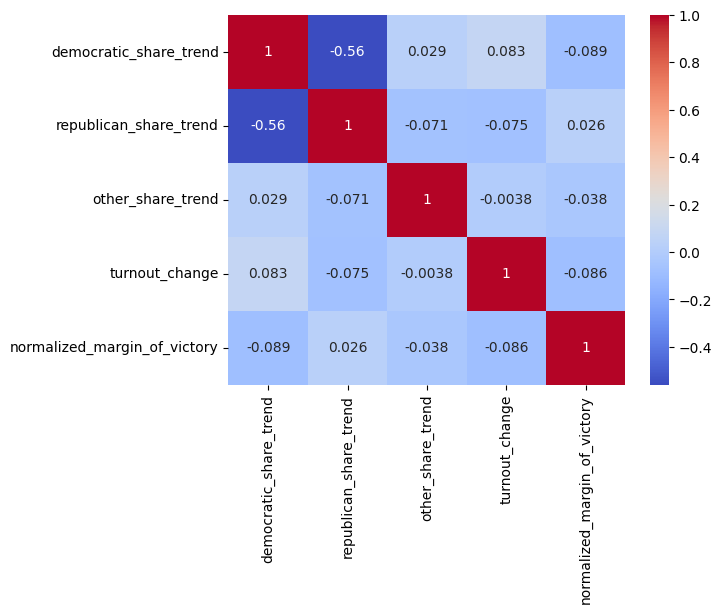

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = pd.DataFrame(X, columns=feature_names).corr()

# Plot the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Negative Coefficient for democratic_share_trend

Our model predicts the likelihood of a Democratic win, however the democratic_share_trend variable has a negative coefficient. This means that as the Democratic vote share trend increases over time, the log-odds of a Democratic win decrease. In other words, a county with a rising trens in Democratic vote share is less likely to have the Democratic candidate win.

Our reasoning:
- many less populated counties in VA are red counties
- no matter if the percentage of people voting democratically increases, the county will still vote republican
  - county remains republican even if republican vote share is declining
  - could this change in the future if the vote trend continues to decrease?
- democratic increasing trends doesn't necessarily imply an outright dem win

Reminder that this doesn't correlate to overall VA winner, since the few counties that vote Democratic are highly populated

## Lasso

Determine if we used the right feature variables. Here we ran the logistic regression model with the penalty set to "l1". The L1 penalty, otherwise known as the Lasso, is the sum of the absolute values of the model's coefficients. This deals with the trade-off between bias and variance. L1 tends to drive some coefficients to zero, removing them from the model and making the model simpler. The features that are removed were less important when predicting the outcomes in counties. We do this to reduce overfitting.

In [21]:
from sklearn.linear_model import LogisticRegression

y = county_votes["winner"]
X = county_votes[['other_vote_share', 'democratic_trend',	'republican_trend',
                  'other_trend', 'democratic_share_trend', 'republican_share_trend',
                  'other_share_trend', 'turnout_change', 'normalized_margin_of_victory']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.7204968944099379


In [22]:
coefs = model.coef_[0]
feature_names = ['other_vote_share', 'democratic_trend',	'republican_trend',
                 'other_trend', 'democratic_share_trend', 'republican_share_trend',
                 'other_share_trend', 'turnout_change', 'normalized_margin_of_victory']
results = pd.DataFrame({'variable': feature_names, 'coefficient': coefs})
print(results)

                       variable  coefficient
0              other_vote_share     0.000000
1              democratic_trend     0.000000
2              republican_trend    -0.067071
3                   other_trend    -0.245334
4        democratic_share_trend    -0.518138
5        republican_share_trend    -4.221393
6             other_share_trend    -0.257635
7                turnout_change     0.394282
8  normalized_margin_of_victory    -0.172645


When performing the lasso, we removed the variables democrat_vote_share	and republican_vote_share, since this would make our predictive model trivial. Of the remaining variables, we can see that it zeroed out other_vote_share and democratic_trend, marking them as insignificant to the prediction.

The lasso does include republican_trend and other_trend, where our initial model does not. These do contribute to the predictive accuracy, however the inclusion of them lowers the testing accuracy to 0.72 (from 0.745 of our original model). Since the accuracy decreases, we determined that our original model uses the right amount of variables that reduce the error the most. We can also see that the feature variables are not too closely correlated.

**Notes from lecture**
- look into this to add into analysis
- perform cv and lasso
- multi colinearity
- add this into limitations or ways to improve model in our paper

In the case of linear models, we can explore the consequences of ommitting variables that should arguably be in the model (underfitting) and adding too many variable (overfitting):

**Underfitting:** When we leave out variables, we get a phenomenon called omitted variables bias, where the coefficients in the model adjust to compensate for missing variables
- "correlation is not causation"

**Overfitting:** When we include too many variables, we get a phenomenon called multicolinearity or bad control, where the variables are competing to explain the same variation in and "get in each other's way," resulting in a low quality model

- "So if your goal is prediction, you are willing to allow for some bias in order to reduce the variance of your predictor: OVB, for example, can be a price worth paying if your goal is prediction"
  recognize that our model is biased in our paper and that it might have consequences for interpretation


## Predicting the 2024 Presidential Election outcomes

In [23]:
print(county_votes[county_votes['year'] == 2020])

     year        county_name  county_fips  democrat_votes  republican_votes  \
5    2020           ACCOMACK        51001            7578              9172   
11   2020          ALBEMARLE        51003           42466             20804   
17   2020    ALEXANDRIA CITY        51510           66240             14544   
23   2020          ALLEGHANY        51005            2243              5859   
29   2020             AMELIA        51007            2411              5390   
..    ...                ...          ...             ...               ...   
778  2020  WILLIAMSBURG CITY        51830            4790              1963   
784  2020    WINCHESTER CITY        51840            6610              5221   
790  2020               WISE        51195            3110             13366   
796  2020              WYTHE        51197            3143             11733   
802  2020               YORK        51199           17683             20241   

     other_votes  total_votes  democrat_vote_share 

In [24]:
def pct_change(old_value, new_value):
    return ((new_value - old_value) / old_value) * 100

# copy of 2020 data, which we will use to get estimated data for 2024
data_2024 = county_votes[county_votes['year'] == 2020].copy()

# change year to 2024
data_2024['year'] = 2024

# do calculations for democrat, republican, and other votes
data_2024['democrat_votes_2024'] = round(data_2024['democrat_votes'] * (1 + data_2024['democratic_trend']))
data_2024['republican_votes_2024'] = round(data_2024['republican_votes'] * (1 + data_2024['republican_trend']))
data_2024['other_votes_2024'] = round(data_2024['other_votes'] * (1 + data_2024['other_trend']))

# predicted 2024 total votes
data_2024['total_votes_2024'] = data_2024['democrat_votes_2024'] + data_2024['republican_votes_2024'] + data_2024['other_votes_2024']

# predicted vote shares
data_2024['democrat_vote_share_2024'] = data_2024['democrat_votes_2024'] / data_2024['total_votes_2024']
data_2024['republican_vote_share_2024'] = data_2024['republican_votes_2024'] / data_2024['total_votes_2024']
data_2024['other_vote_share_2024'] = data_2024['other_votes_2024'] / data_2024['total_votes_2024']

# predicted vote share trends
data_2024['democratic_share_trend_2024'] = pct_change(data_2024['democrat_vote_share'], data_2024['democrat_vote_share_2024'])
data_2024['republican_share_trend_2024'] = pct_change(data_2024['republican_vote_share'], data_2024['republican_vote_share_2024'])
data_2024['other_share_trend_2024'] = pct_change(data_2024['other_vote_share'], data_2024['other_vote_share_2024'])

# turnout change based on predicted total votes
data_2024['turnout_change_2024'] = pct_change(data_2024['total_votes'], data_2024['total_votes_2024'])

# predicted margin of victory
data_2024['margin_of_victory_2024'] = data_2024['republican_votes_2024'] - data_2024['democrat_votes_2024']
data_2024['margin_of_victory_2024'] = np.abs(data_2024['margin_of_victory_2024'])

# normalize the margin of victory
data_2024['normalized_margin_of_victory_2024'] = data_2024['margin_of_victory_2024'] / data_2024['total_votes_2024']

# keep only relevant columns
data_2024 = data_2024[['year', 'county_name', 'county_fips', 'democrat_votes_2024',
                       'republican_votes_2024', 'other_votes_2024', 'total_votes_2024',
                       'democrat_vote_share_2024', 'republican_vote_share_2024',
                       'other_vote_share_2024', 'democratic_share_trend_2024',
                       'republican_share_trend_2024', 'other_share_trend_2024',
                       'turnout_change_2024', 'margin_of_victory_2024', 'normalized_margin_of_victory_2024']]

# rename variables to match original data
data_2024.rename(columns={
    'democrat_votes_2024': 'democrat_votes',
    'republican_votes_2024': 'republican_votes',
    'other_votes_2024': 'other_votes',
    'total_votes_2024': 'total_votes',
    'democrat_vote_share_2024': 'democrat_vote_share',
    'republican_vote_share_2024': 'republican_vote_share',
    'other_vote_share_2024': 'other_vote_share',
    'democratic_share_trend_2024': 'democratic_share_trend',
    'republican_share_trend_2024': 'republican_share_trend',
    'other_share_trend_2024': 'other_share_trend',
    'margin_of_victory_2024': 'margin_of_victory',
    'turnout_change_2024': 'turnout_change',
    'normalized_margin_of_victory_2024': 'normalized_margin_of_victory'
}, inplace=True)

data_2024.head()

<ipython-input-24-d5de774772ab>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024.rename(columns={


,year,county_name,county_fips,democrat_votes,republican_votes,other_votes,total_votes,democrat_vote_share,republican_vote_share,other_vote_share,democratic_share_trend,republican_share_trend,other_share_trend,turnout_change,margin_of_victory,normalized_margin_of_victory
5,2024,ACCOMACK,51001,8520.0,9801.0,91.0,18412.0,0.462742,0.532316,0.004942,3.576465,-1.557545,-60.455907,8.548520,1281.0,0.069574
11,2024,ALBEMARLE,51003,54082.0,22473.0,467.0,77022.0,0.702163,0.291774,0.006063,6.908478,-9.319279,-71.735508,19.123993,31609.0,0.410389
17,2024,ALEXANDRIA CITY,51510,76652.0,15922.0,575.0,93149.0,0.822897,0.170930,0.006173,2.515481,-3.016012,-70.673900,12.879146,60730.0,0.651966
23,2024,ALLEGHANY,51005,2323.0,7043.0,36.0,9402.0,0.247075,0.749096,0.003829,-9.640795,4.878545,-68.901919,14.616604,4720.0,0.502021
29,2024,AMELIA,51007,2732.0,6171.0,42.0,8945.0,0.305422,0.689883,0.004695,0.000060,1.037725,-60.144972,13.313909,3439.0,0.384461


## Make predictions of 2024 data

In [25]:
X_2024 = data_2024[['democratic_share_trend', 'republican_share_trend',
                 'other_share_trend', 'turnout_change', 'normalized_margin_of_victory']]

scaler = StandardScaler()
X_2024 = scaler.fit_transform(X_2024)

pred_2024 = lm.predict(X_2024)

print(pred_2024)

data_2024['winner'] = pred_2024
data_2024.head()

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1]


,year,county_name,county_fips,democrat_votes,republican_votes,other_votes,total_votes,democrat_vote_share,republican_vote_share,other_vote_share,democratic_share_trend,republican_share_trend,other_share_trend,turnout_change,margin_of_victory,normalized_margin_of_victory,winner
5,2024,ACCOMACK,51001,8520.0,9801.0,91.0,18412.0,0.462742,0.532316,0.004942,3.576465,-1.557545,-60.455907,8.548520,1281.0,0.069574,0
11,2024,ALBEMARLE,51003,54082.0,22473.0,467.0,77022.0,0.702163,0.291774,0.006063,6.908478,-9.319279,-71.735508,19.123993,31609.0,0.410389,1
17,2024,ALEXANDRIA CITY,51510,76652.0,15922.0,575.0,93149.0,0.822897,0.170930,0.006173,2.515481,-3.016012,-70.673900,12.879146,60730.0,0.651966,0
23,2024,ALLEGHANY,51005,2323.0,7043.0,36.0,9402.0,0.247075,0.749096,0.003829,-9.640795,4.878545,-68.901919,14.616604,4720.0,0.502021,0
29,2024,AMELIA,51007,2732.0,6171.0,42.0,8945.0,0.305422,0.689883,0.004695,0.000060,1.037725,-60.144972,13.313909,3439.0,0.384461,0


In [30]:
data_2024.to_csv('county_predictions_2024.csv', index=False)

## Actual Data from 2024 Elections

I collected the actual election results from https://www.wvtf.org/2024-virginia-election-results. I transferred the information from the table they provide to google sheets and cleaned the data there. It consisted of:
- changing percent values to decimal
- capitalizing county names to match data from voting_VA.csv
- deleting unnecessary columns

In [26]:
results_2024 = pd.read_csv('/results_2024.csv', low_memory=False)
print(results_2024.shape, '\n')
print(results_2024.dtypes, '\n')
print(results_2024.columns, '\n')
results_2024.head()

(133, 5) 

COUNTY         object
DEMOCRAT      float64
REPUBLICAN    float64
OTHER         float64
_LOWER         object
dtype: object 

Index(['COUNTY', 'DEMOCRAT', 'REPUBLICAN', 'OTHER', '_LOWER'], dtype='object') 



,COUNTY,DEMOCRAT,REPUBLICAN,OTHER,_LOWER
0,ACCOMACK,0.43,0.56,0.01,Accomack
1,ALBEMARLE,0.66,0.32,0.01,Albemarle
2,ALEXANDRIA,0.78,0.20,0.02,Alexandria
3,ALLEGHANY,0.26,0.74,0.01,Alleghany
4,AMELIA,0.28,0.72,0.01,Amelia


## Add Winner column

If percent of Democratic votes is larger, then assign 'winner' a 1. Else, assign it a 0.

In [27]:
results_2024 = results_2024.loc[:,['COUNTY', 'DEMOCRAT', 'REPUBLICAN', 'OTHER']]
results_2024['winner'] = np.where(results_2024['REPUBLICAN'] < results_2024['DEMOCRAT'], 1, 0)
results_2024.head()

,COUNTY,DEMOCRAT,REPUBLICAN,OTHER,winner
0,ACCOMACK,0.43,0.56,0.01,0
1,ALBEMARLE,0.66,0.32,0.01,1
2,ALEXANDRIA,0.78,0.20,0.02,1
3,ALLEGHANY,0.26,0.74,0.01,0
4,AMELIA,0.28,0.72,0.01,0


In [29]:
results_2024.to_csv('county_results_2024.csv', index=False)

## Calculate accuracy
Calculate the accuracy of the model when predicting 2024 results when the voting data follows the trends calculated for 2020.

In [28]:
actual_2024 = results_2024['winner'].to_numpy()
accuracy = accuracy_score(pred_2024, actual_2024)
print("Accuracy:", accuracy)

Accuracy: 0.7819548872180451
